In [142]:
gate1=pd.read_csv('\'17년 스피드게이트 1 출입내역 (1).CSV',header=None) 
gate2=pd.read_csv('\'17년 스피드게이트 2 출입내역 (1) (1).CSV',header=None)
gate3=pd.read_csv('\'17년 스피드게이트 3 출입내역 (1).CSV',header=None)
# gate4=pd.read_csv('\'18년 스피드게이트 1 출입내역 (1).CSV',header=None)
# gate5=pd.read_csv('\'18년 스피드게이트 2 출입내역 (2).CSV',header=None) 
gate6=pd.read_csv('\'18년 스피드게이트 3 출입내역 (1).CSV',header=None)

In [143]:
def func(gate1):  
    gate1=gate1[(gate1[1]!='SAT')&(gate1[1]!='SUN')]    
    gate1[3]=gate1[0].apply(lambda x:str(x)[-5:])
    gate1[0]=gate1[0].apply(lambda x:str(x).split(' ')[0])
    gate1=gate1[gate1[3]<'10:00']
    gate1=gate1.drop(3,axis=1)
    gate1=gate1.drop_duplicates().groupby(0).count()
    return gate1

In [560]:
def func2(gate1):
    gate1=gate1[(gate1[1]!='SAT')&(gate1[1]!='SUN')]    
    gate1[3]=gate1[0].apply(lambda x:str(x)[-5:])
    gate1[0]=gate1[0].apply(lambda x:str(x).split(' ')[0])
    gate1=gate1[(gate1[3]>'12:00')&(gate1[3]<'13:00')]
    gate1=gate1.drop(3,axis=1)
    gate1=gate1.drop_duplicates().groupby(0).count().drop(2,axis=1)
    return gate1

In [144]:
df3=func(gate3)
df2=func(gate2)
df1=func(gate1)

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [145]:
df1.rename(columns={1:'cnt1'},inplace=True)
df2.rename(columns={1:'cnt2'},inplace=True)
df3.rename(columns={1:'cnt3'},inplace=True)

In [146]:
df=pd.concat([df1,df2,df3],axis=1)

In [147]:
df['count']=df['cnt1']+df['cnt2']+df['cnt3']

In [295]:
count=pd.concat([df,df0])

In [336]:
df=pd.concat([g1,g2,g3],axis=1)

In [554]:
read=pd.read_csv('lnch_m3w5_train_0414.csv')

In [304]:
df=pd.merge(read,count,how='outer')

In [309]:
df=df.drop('target_value',axis=1)

In [317]:
df=df[:730]

In [323]:
df=df.drop('item_id',axis=1)

In [321]:
p=pd.read_csv('gate.csv')

In [325]:
cnt=pd.concat([df,p])

In [326]:
cnt.to_csv('gate1.csv',index=False)

In [435]:
f=pd.read_csv('lnch_long_rel_0422.csv')

In [415]:
gate1.to_csv('related_gate.csv',index=False)

In [416]:
f=pd.read_csv('lnch_m3w5_train_0417.csv')

In [363]:
f=f[:1095]

In [365]:
po=pd.merge(f,cnt)

In [367]:
po['prob']=po['target_value']/po['count']

In [378]:
po['prob']=po['prob'].apply(lambda x: str(x).replace('nan','0'))

In [381]:
po['timestamp']=pd.to_datetime(po['timestamp'])
import calendar
po['yoil']=po['timestamp'].apply(lambda x:calendar.weekday(x.year,x.month,x.day))

In [387]:
po['prob']=po['prob'].apply(lambda x:float(x))

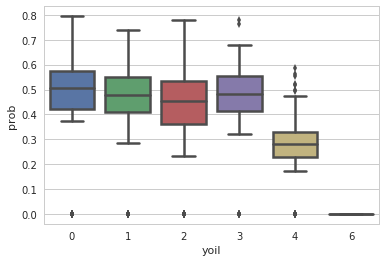

In [389]:
import seaborn as sns
sns.set(style="whitegrid")
# ax = sns.boxplot(x=lnch_df[lnch_df['yoil']==4]['target_value'])
ax = sns.boxplot(x="yoil", y='prob',data=po[po['yoil']!=5], linewidth=2.5)

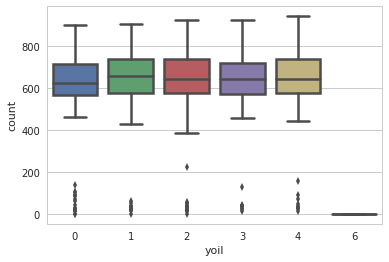

In [390]:
import seaborn as sns
sns.set(style="whitegrid")
# ax = sns.boxplot(x=lnch_df[lnch_df['yoil']==4]['target_value'])
ax = sns.boxplot(x="yoil", y='count',data=po[po['yoil']!=5], linewidth=2.5)

In [393]:
po[['target_value','count']].corr()

,target_value,count
target_value,1.000000,0.875233
count,0.875233,1.000000


In [395]:
target =po[['timestamp','item_id','target_value']]
gate2=po[['timestamp','item_id','count']]

In [399]:
target.to_csv('target.csv',index=False)
# gate2.to_csv('gate2.csv',index=False)

In [170]:
cnt

NameError: name 'cnt' is not defined

In [428]:
ty=pd.merge(f,cnt,how='left')[:1095]

In [430]:
ty=ty.fillna(0)

In [432]:
ty=ty.drop('target_value',axis=1)

In [433]:
ty.to_csv('gate.csv',index=False)

In [171]:
ty

NameError: name 'ty' is not defined

In [438]:
hj=pd.merge(f,ty)

In [454]:
def gyu(hj):
    if hj['holiday']==1:
        return 0
    else: 
        return hj['count']

In [456]:
hj['count']=hj.apply(gyu,axis=1)

In [471]:
hj=hj[['timestamp', 'item_id', 'abnormal', 'holiday', 'before_holiday', 'after_holiday', 'closed','fri', 'sat', 'sun', 'dayofweek_median','dayofweek_mean', 'day_cos', 'day_sin', 'count']]

In [472]:
hj.to_csv('related_gate_ii.csv',index=False)

In [465]:
fg=pd.read_csv('target.csv')

In [468]:
fg=fg[:978]

In [469]:
fg.to_csv('target_f14.csv',index=False)

In [473]:
hj['timestamp']=pd.to_datetime(hj['timestamp'])
import calendar
hj['yoil']=hj['timestamp'].apply(lambda x:calendar.weekday(x.year,x.month,x.day))

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [480]:
hj[(hj['yoil']==4)&(hj['count']!=0)&(hj['holiday']!=1)][['timestamp','count']].to_csv('frii.csv',index=False)

In [486]:
def ryu(hj):
    return hj.groupby(['yoil','year']).median()['count']


hj['cnt_median']=hj.apply(ryu,axis=1) 

TypeError: ("'int' object is not callable", 'occurred at index 0')

In [491]:
hj['year']=hj['timestamp'].apply(lambda x: x.year)

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [567]:
hj

,item_id,abnormal,holiday,before_holiday,after_holiday,closed,fri,sat,sun,dayofweek_median,dayofweek_mean,day_cos,day_sin,count,yoil,cnt_median,year
timestamp,,,,,,,,,,,,,,,,,
2017-01-01,중식_소계,0,1,0,0,1,0,0,1,0.0,0.000000,1.000000,-2.449294e-16,0.0,6,621.0,2017
2017-01-02,중식_소계,0,0,0,1,0,0,0,0,353.5,328.335294,0.623490,7.818315e-01,0.0,0,654.0,2017
2017-01-03,중식_소계,0,0,0,0,0,0,0,0,330.5,314.564706,-0.222521,9.749279e-01,742.0,1,641.0,2017
2017-01-04,중식_소계,0,0,0,0,0,0,0,0,311.0,292.550296,-0.900969,4.338837e-01,744.0,2,644.5,2017
2017-01-05,중식_소계,0,0,0,0,0,0,0,0,326.0,321.958580,-0.900969,-4.338837e-01,710.0,3,642.0,2017
2017-01-06,중식_소계,0,0,0,0,0,1,0,0,192.0,205.230769,-0.222521,-9.749279e-01,748.0,4,0.0,2017
2017-01-07,중식_소계,0,0,0,0,0,0,1,0,0.0,0.000000,0.623490,-7.818315e-01,0.0,5,0.0,2017
2017-01-08,중식_소계,0,0,0,0,0,0,0,1,0.0,0.000000,1.000000,-2.449294e-16,0.0,6,NaN,2017
2017-01-09,중식_소계,0,0,0,0,0,0,0,0,353.5,328.335294,0.623490,7.818315e-01,752.0,0,NaN,2017


In [579]:
hj.groupby(['yoil','year']).median()['count']

yoil  year
0     2017    700.5
      2018    648.0
      2019    571.5
1     2017    728.0
      2018    674.5
      2019    578.0
2     2017    732.5
      2018    655.5
      2019    573.5
3     2017    717.0
      2018    667.5
      2019    566.5
4     2017    737.5
      2018    669.0
      2019    553.0
5     2017      0.0
      2018      0.0
      2019      0.0
6     2017      0.0
      2018      0.0
      2019      0.0
Name: count, dtype: float64

In [605]:
import numpy as np
tu=[0,571.5, 578.0,573.5, 566.5,553.0,0]

In [611]:
o=[]
for i in range(156):
    o.extend([0,571.5, 578.0,573.5, 566.5,553.0,0])

In [624]:
o

In [627]:
hj['cnt_median']=pd.Series(o)

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [169]:
hj

NameError: name 'hj' is not defined

In [569]:
hj.groupby(['yoil','year']).mean()['count']

yoil  year
0     2017    614.269231
      2018    598.339623
      2019    543.000000
1     2017    680.711538
      2018    612.230769
      2019    555.264151
2     2017    703.461538
      2018    614.134615
      2019    522.153846
3     2017    701.230769
      2018    657.403846
      2019    523.076923
4     2017    689.711538
      2018    670.557692
      2019    513.134615
5     2017      0.000000
      2018      0.000000
      2019      0.000000
6     2017      0.000000
      2018      0.000000
      2019      0.000000
Name: count, dtype: float64

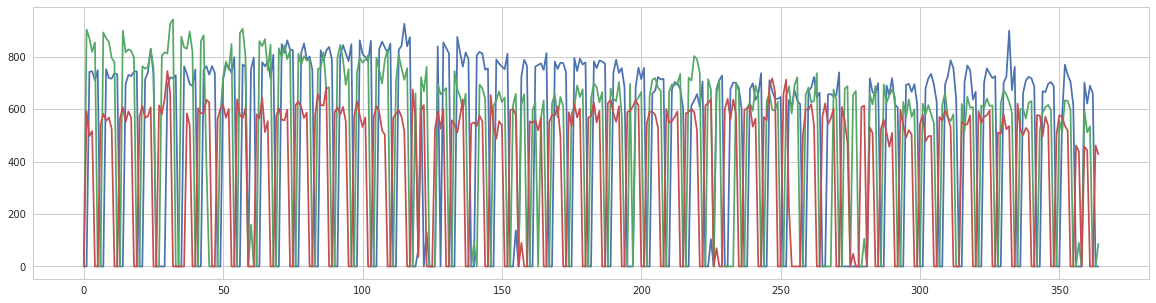

In [516]:
# hj.groupby('year')['count'].plot(legend=True)
import matplotlib.pyplot as plt 
_ =plt.figure(figsize=(20, 5)) 

# plt.subplot(3,1,1)
_ =plt.plot(hj17['count'])

# plt.subplot(3,1,2)
_ =plt.plot(hj18['count'])

# plt.subplot(3,1,3)
_ =plt.plot(hj19['count'])

plt.show()

In [501]:
hj17=hj[hj['year']==2017]
hj18=hj[hj['year']==2018]
hj19=hj[hj['year']==2019]

In [506]:
hj17.reset_index(inplace=True)
hj18.reset_index(inplace=True)
hj19.reset_index(inplace=True)

In [525]:
lo=pd.merge(ty,target)

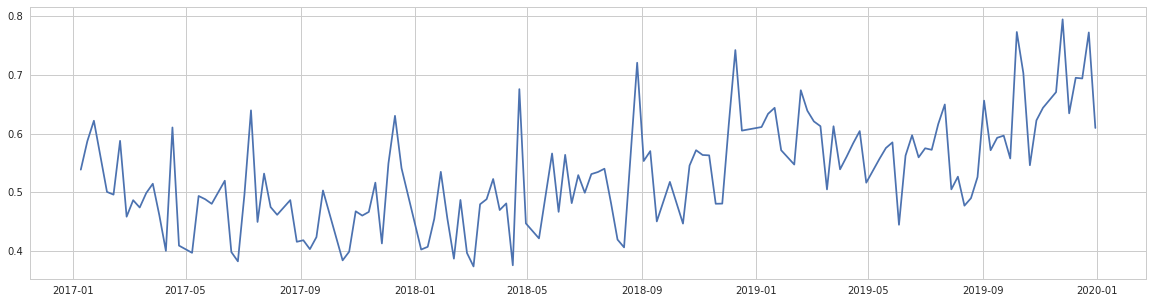

In [545]:
import matplotlib.pyplot as plt 
_ =plt.figure(figsize=(20, 5)) 
_ =plt.plot(lo[(lo['yoil']==0)&(lo['prob']!=0)]['timestamp'],lo[(lo['yoil']==0)&(lo['prob']!=0)]['prob'])
plt.show()

In [549]:
lol=pd.merge(lo,hj).drop(['target_value'],axis=1)

In [552]:
lol=lol.drop(['day_cos','day_sin'],axis=1)

In [559]:
lol[1101:]

,timestamp,item_id,count,prob,yoil,abnormal,holiday,before_holiday,after_holiday,closed,fri,sat,sun,dayofweek_median,dayofweek_mean,cnt_median,year
1101,2017-02-19,중식_소계,0.0,0.000000,6,0,0,0,0,0,0,0,1,0.0,0.000000,NaN,2017
1102,2017-02-19,중식_소계,0.0,0.000000,6,1,0,0,0,0,0,0,1,0.0,0.000000,NaN,2017
1103,2017-02-19,중식_소계,0.0,0.000000,6,0,1,1,1,1,0,0,1,0.0,0.000000,NaN,2017
1104,2017-02-19,중식_소계,0.0,0.000000,6,0,0,0,0,0,0,0,1,0.0,0.000000,NaN,2017
1105,2017-02-19,중식_소계,0.0,0.000000,6,0,0,0,0,0,0,0,1,0.0,0.000000,NaN,2017
1106,2017-02-19,중식_소계,0.0,0.000000,6,0,0,0,0,0,0,0,1,0.0,0.000000,NaN,2017
1107,2017-02-19,중식_소계,0.0,0.000000,6,0,0,0,0,0,0,0,1,0.0,0.000000,NaN,2017
1108,2017-02-19,중식_소계,0.0,0.000000,6,0,0,0,0,0,0,0,1,0.0,0.000000,NaN,2017
1109,2017-02-19,중식_소계,0.0,0.000000,6,0,0,0,0,0,0,0,1,0.0,0.000000,NaN,2017
1110,2017-02-19,중식_소계,0.0,0.000000,6,0,0,0,0,0,0,0,1,0.0,0.000000,NaN,2017


In [555]:
len(read)

1181

In [204]:
import pandas as pd
pd.read_excel('\'19년 스피드 게이트 4 (1) (1).xlsx',index_col=0).iloc[[5,9],[2,3,4,5,6]]

,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
출입통제 조회,,,,,
1,10027 - 04,스피드게이트4,00000000-20002613,당직2,안내데스크
5,10027 - 04,스피드게이트4,00000000-43004326,이윤호,21127


In [214]:
gate171=pd.read_excel('\'19년 스피드 게이트 4 (1) (1).xlsx',index_col=0).iloc[5:,[0,1,4]]
gate172=pd.read_excel('\'19년 스피드 게이트 5 (1).xlsx',index_col=0).iloc[5:,[0,1,4]]
gate173=pd.read_excel('\'19년 스피드 게이트 6 (1) (1).xlsx',index_col=0).iloc[5:,[0,1,4]]
# gate181=pd.read_excel('\'18년 스피드게이트 4 출입내역 (1).xlsx',index_col=0).iloc[5:,[0,1,4]]
# gate182=pd.read_excel('\'18년 스피드게이트 5 출입내역 (1).xlsx',index_col=0).iloc[5:,[0,1,4]]
# gate183=pd.read_excel('\'18년 스피드게이트 6 출입내역 (1).xlsx',index_col=0).iloc[5:,[0,1,4]]

In [215]:
gate172

,Unnamed: 1,Unnamed: 2,Unnamed: 5
출입통제 조회,,,
1,2017-06-11 12:18:24,SUN,00000000-56000155
2,2017-06-11 19:06:52,SUN,00000000-03868341
3,2017-06-11 19:06:55,SUN,00000000-03868338
4,2017-06-11 19:06:58,SUN,00000000-03868340


In [206]:
def func2(gate1):
    gate1=gate1.rename(columns={'Unnamed: 1':0,'Unnamed: 2':1,'Unnamed: 5':2})
    gate1=gate1[(gate1[1]!='SAT')&(gate1[1]!='SUN')]    
    gate1[3]=gate1[0].apply(lambda x:str(x)[-8:])
    gate1[0]=gate1[0].apply(lambda x:str(x).split(' ')[0])
    gate1=gate1[(gate1[1]=='FRI')&(gate1[3]>'11:30')&(gate1[3]<'12:30')|(gate1[3]>'12:00')&(gate1[3]<'12:35')&(gate1[1]!='FRI')]
    gate1=gate1.drop(3,axis=1)
    gate1=gate1.drop_duplicates().groupby(0).count().drop(2,axis=1)
    return gate1

In [207]:
gate171=func2(gate171)
gate172=func2(gate172)
gate173=func2(gate173)

# gate181=func2(gate181)
# gate182=func2(gate182)
# gate183=func2(gate183)

In [208]:
gate171.rename(columns={1:'cnt1'},inplace=True)
gate172.rename(columns={1:'cnt2'},inplace=True)
gate173.rename(columns={1:'cnt3'},inplace=True)

# gate181.rename(columns={1:'cnt1'},inplace=True)
# gate182.rename(columns={1:'cnt2'},inplace=True)
# gate183.rename(columns={1:'cnt3'},inplace=True)

In [209]:
qw=pd.concat([gate171,gate172,gate173],axis=1)
# er=pd.concat([gate181,gate182,gate183],axis=1)

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [210]:
qw['count']=qw['cnt1']+qw['cnt2']+qw['cnt3']
# er['count']=er['cnt1']+er['cnt2']+er['cnt3']

In [211]:
qw

,cnt1,cnt2,cnt3,count
2019-01-01,4.0,NaN,NaN,NaN
2019-01-02,58.0,NaN,8.0,NaN
2019-01-03,48.0,NaN,7.0,NaN
2019-01-04,75.0,NaN,17.0,NaN
2019-01-07,53.0,NaN,13.0,NaN
2019-01-08,53.0,NaN,26.0,NaN
2019-01-09,53.0,NaN,12.0,NaN
2019-01-10,67.0,NaN,21.0,NaN
2019-01-11,52.0,NaN,11.0,NaN
2019-01-14,61.0,NaN,16.0,NaN


In [201]:
final=pd.merge(related,out,how='left')

In [182]:
related=pd.read_csv('gate_mean_median (1).csv')

In [199]:
out=out.rename(columns={'count':'out'})

In [202]:
final.fillna(0)

,timestamp,item_id,rainfall,rain_prob,temperature,abnormal,holiday,before_holiday,after_holiday,closed,...,dayofweek_median,dayofweek_mean,day_cos,day_sin,count,year,yoil,cnt_mean,cnt_median,out
0,2017-01-01,중식_소계,0.0,0.2,5.5,0,1,0,0,1,...,0.0,0.000000,1.000000,-2.449294e-16,0.0,2017,6,0.000000,0.0,0.0
1,2017-01-02,중식_소계,0.3,0.0,4.8,0,0,0,1,0,...,353.5,328.335294,0.623490,7.818315e-01,0.0,2017,0,543.000000,571.5,0.0
2,2017-01-03,중식_소계,0.0,0.0,2.9,0,0,0,0,0,...,330.5,314.564706,-0.222521,9.749279e-01,742.0,2017,1,555.264151,578.0,148.0
3,2017-01-04,중식_소계,0.0,0.0,3.7,0,0,0,0,0,...,311.0,292.550296,-0.900969,4.338837e-01,744.0,2017,2,522.153846,573.5,146.0
4,2017-01-05,중식_소계,0.0,0.2,6.7,0,0,0,0,0,...,326.0,321.958580,-0.900969,-4.338837e-01,710.0,2017,3,523.076923,566.5,170.0
5,2017-01-06,중식_소계,0.0,0.1,5.7,0,0,0,0,0,...,192.0,205.230769,-0.222521,-9.749279e-01,748.0,2017,4,513.134615,553.0,157.0
6,2017-01-07,중식_소계,0.0,0.2,6.1,0,0,0,0,0,...,0.0,0.000000,0.623490,-7.818315e-01,0.0,2017,5,0.000000,0.0,0.0
7,2017-01-08,중식_소계,0.0,0.3,6.6,0,0,0,0,0,...,0.0,0.000000,1.000000,-2.449294e-16,0.0,2017,6,0.000000,0.0,0.0
8,2017-01-09,중식_소계,0.0,0.0,0.5,0,0,0,0,0,...,353.5,328.335294,0.623490,7.818315e-01,752.0,2017,0,543.000000,571.5,169.0
9,2017-01-10,중식_소계,0.0,0.0,-4.3,0,0,0,0,0,...,330.5,314.564706,-0.222521,9.749279e-01,718.0,2017,1,555.264151,578.0,141.0
